# Heart Disease Prediction

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,f1_score,precision_score,recall_score
#from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data=pd.read_csv('/kaggle/input/heart-disease/HeartDisease.csv')
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [20]:
## Missing value identification
df=data.copy()
missing_value=[feature for feature in df.columns if df[feature].isna().sum()!=0]

No missing value is present is dataset

In [21]:
#categorical variable and their cardinality
df=data.copy()
categorical=[feature for feature in df.columns if df[feature].dtype=='O']
for i in categorical:
    print(f'{i} has {len(df[i].unique())} nos of distinct values')

sex has 2 nos of distinct values
chest_pain_type has 4 nos of distinct values
fasting_blood_sugar has 2 nos of distinct values
rest_ecg has 3 nos of distinct values
exercise_induced_angina has 2 nos of distinct values
slope has 3 nos of distinct values
vessels_colored_by_flourosopy has 5 nos of distinct values
thalassemia has 4 nos of distinct values


As many categorical variables are present so we have to one hot encode those variables

In [22]:
for i in categorical:
    dummy=pd.get_dummies(df[i],drop_first=True,prefix=i,prefix_sep='_')
    df=pd.concat((df,dummy),axis=1)
    df.drop(i,axis=1,inplace=True)

In [37]:
df.columns

Index(['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate',
       'oldpeak', 'target', 'sex_Male', 'chest_pain_type_Atypical angina',
       'chest_pain_type_Non-anginal pain', 'chest_pain_type_Typical angina',
       'fasting_blood_sugar_Lower than 120 mg/ml', 'rest_ecg_Normal',
       'rest_ecg_ST-T wave abnormality', 'exercise_induced_angina_Yes',
       'slope_Flat', 'slope_Upsloping', 'vessels_colored_by_flourosopy_One',
       'vessels_colored_by_flourosopy_Three',
       'vessels_colored_by_flourosopy_Two',
       'vessels_colored_by_flourosopy_Zero', 'thalassemia_No',
       'thalassemia_Normal', 'thalassemia_Reversable Defect'],
      dtype='object')

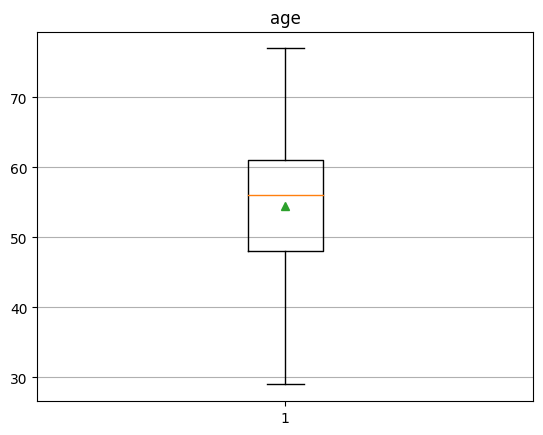

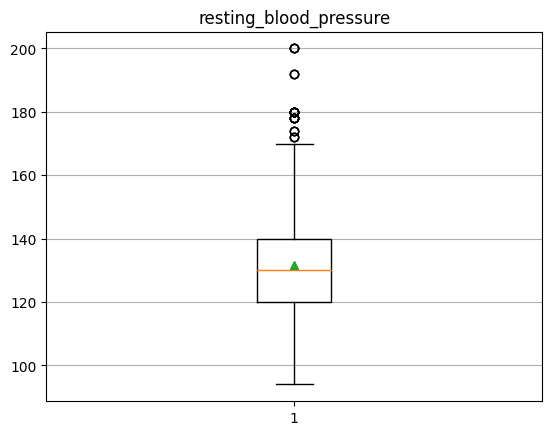

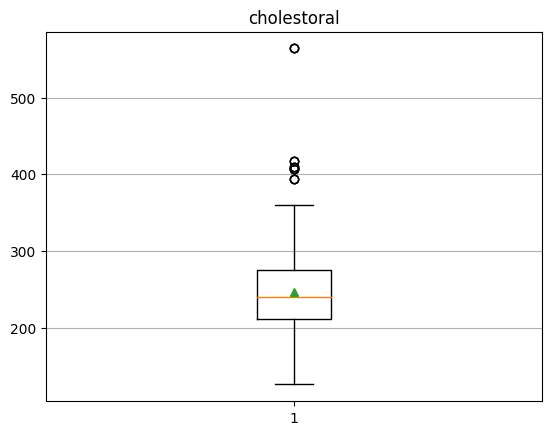

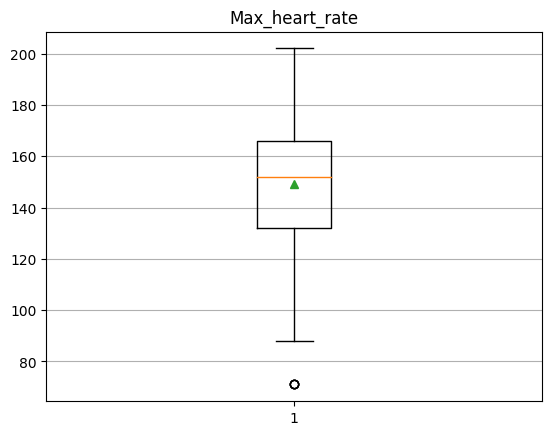

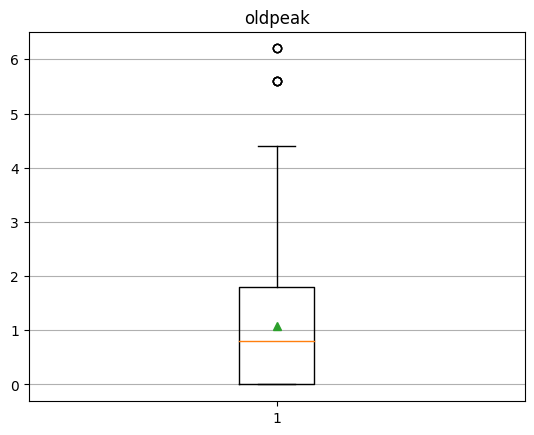

In [23]:
#Numeric data outlier detection
data2=data.copy()
numeric_data=[feature for feature in data2.columns if feature not in categorical+['target']]
for i in numeric_data:
    plt.boxplot(data2[i],showmeans=True)
    plt.grid(axis='y')
    plt.title(i)
    plt.show();

resting blood pressure the limit can be assumed as 170 mg Hg and cholestoral its nearly 400. For other variables the no of outliers are too less

In [32]:
#Numerically 
import scipy.stats as st
for i in numeric_data:
    print(f"the upper limit of {i} is {st.scoreatpercentile(data[i],75)+1.5*st.iqr(data[i])} and lower limit of {i} is {st.scoreatpercentile(data[i],25)-1.5*st.iqr(data[i])}")

the upper limit of age is 80.5 and lower limit of age is 28.5
the upper limit of resting_blood_pressure is 170.0 and lower limit of resting_blood_pressure is 90.0
the upper limit of cholestoral is 371.0 and lower limit of cholestoral is 115.0
the upper limit of Max_heart_rate is 217.0 and lower limit of Max_heart_rate is 81.0
the upper limit of oldpeak is 4.5 and lower limit of oldpeak is -2.7


We can see that we get almost similar values numerically also

In [35]:
data2[((data2['cholestoral']>=371)|(data['cholestoral']<=115))&((data2['resting_blood_pressure']>=170)|(data['resting_blood_pressure']<=90))]
#as the value does not occur all together for both variable we need not to drop any outlier

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target


In [36]:
#dataset for exploratory data analysis
data1=data.copy()
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for i in categorical:
    data1[i]=lab.fit_transform(data1[i])

In [15]:
#data dictionary:
for i in categorical:
    print(i)
    for j in data[i].unique():
        print(f'{data1[data[i]==j][i].unique()} : {j}')

sex
[1] : Male
[0] : Female
chest_pain_type
[3] : Typical angina
[1] : Atypical angina
[2] : Non-anginal pain
[0] : Asymptomatic
fasting_blood_sugar
[1] : Lower than 120 mg/ml
[0] : Greater than 120 mg/ml
rest_ecg
[2] : ST-T wave abnormality
[1] : Normal
[0] : Left ventricular hypertrophy
exercise_induced_angina
[0] : No
[1] : Yes
slope
[0] : Downsloping
[2] : Upsloping
[1] : Flat
vessels_colored_by_flourosopy
[3] : Two
[4] : Zero
[1] : One
[2] : Three
[0] : Four
thalassemia
[3] : Reversable Defect
[0] : Fixed Defect
[2] : Normal
[1] : No


# Exploratory data analysis

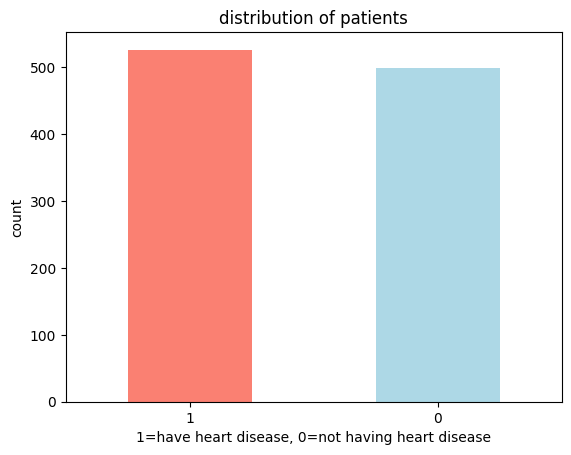

In [16]:
data2=data1.copy()
data2.target.value_counts().plot(kind='bar',color=['salmon','lightblue'])
plt.xlabel('1=have heart disease, 0=not having heart disease')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.title('distribution of patients');
#data2.groupby('target').agg({'age':'count'}).rename(columns={'age':'count'})

We can see the data is balanced 

In [17]:
pd.pivot_table(data=data1,index='sex',columns='target',values='age',aggfunc='count')

target,0,1
sex,,
0,86,226
1,413,300


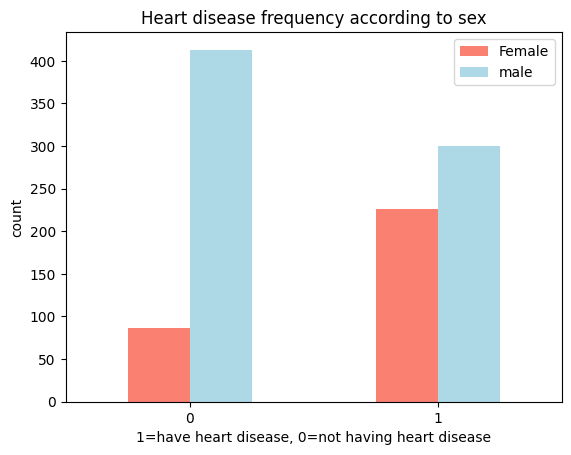

In [18]:
pd.pivot_table(data=data1,index='sex',columns='target',values='age',aggfunc='count')
pd.crosstab(data1['target'],data1['sex']).plot(kind='bar',color=['salmon','lightblue'])
plt.xlabel('1=have heart disease, 0=not having heart disease')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.title('Heart disease frequency according to sex')
plt.legend(['Female','male']);



Here we can see that male persons are having heart disease mostly but if we compare the ratio we can see the majority of female population have heart disease

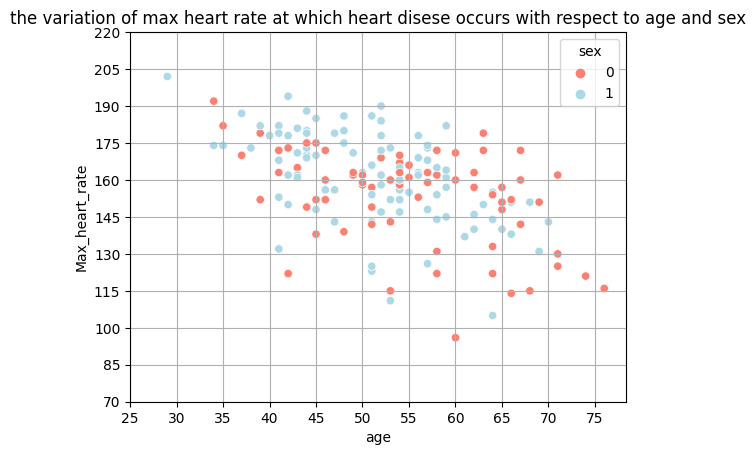

In [19]:
sns.scatterplot(data=data1[data1['target']==1],x='age',y='Max_heart_rate',hue='sex',palette=['salmon','lightblue'])
plt.xticks(np.arange(25,80,5))
plt.yticks(np.arange(70,230,15))
plt.title('the variation of max heart rate at which heart disese occurs with respect to age and sex')
plt.grid();

Here we can see that there is a downward trend of max heart rate with respect to age which is quite expected

In [20]:
data1.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')

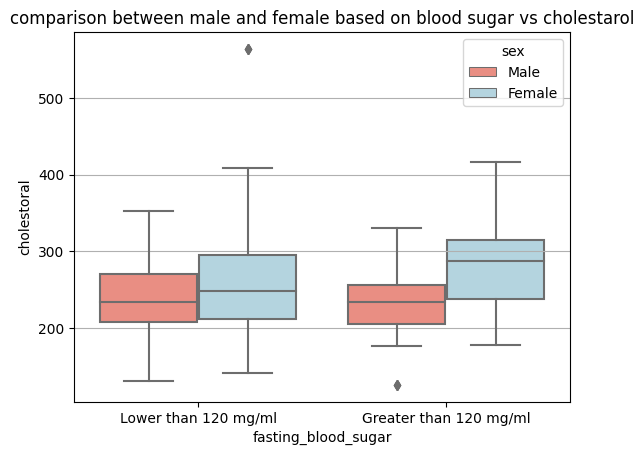

In [21]:
sns.boxplot(data=data,x='fasting_blood_sugar',y='cholestoral',hue='sex',palette=['salmon','lightblue'],whis=1.5)
plt.grid(axis='y')
plt.title('comparison between male and female based on blood sugar vs cholestarol');

Here we can notice a significant variation in blood cholestarol level in female based on their fasting blood sugar which is not very significant for male 

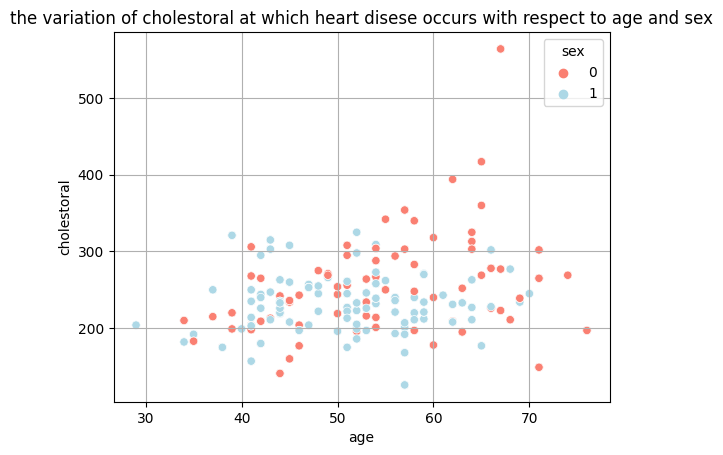

In [22]:
sns.scatterplot(data=data1[data1['target']==1],x='age',y='cholestoral',hue='sex',palette=['salmon','lightblue'])
plt.title('the variation of cholestoral at which heart disese occurs with respect to age and sex')
plt.grid();

Here we can see there is not any specific correlation between age and cholestarol level causing heart disease. Chlestarol is a prime factor for causing heart disease but its independent of age

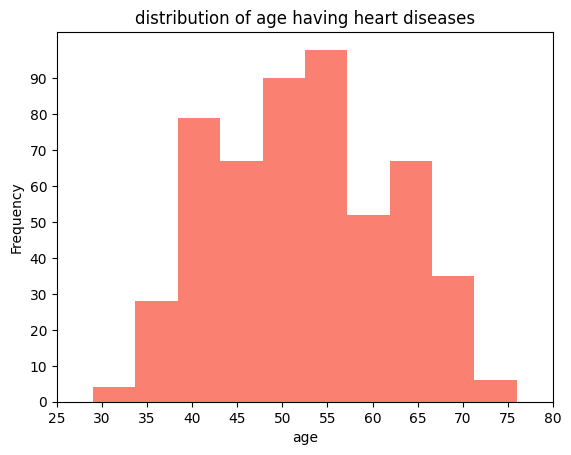

In [38]:
data1[data1['target']==1]['age'].plot(kind='hist',bins=10,color='salmon')
plt.xlabel('age')
plt.xticks(np.arange(25,85,5))
plt.yticks(np.arange(0,100,10))
plt.title('distribution of age having heart diseases');

we can see within the age range of 45 to 60 the heart disease frequency is most

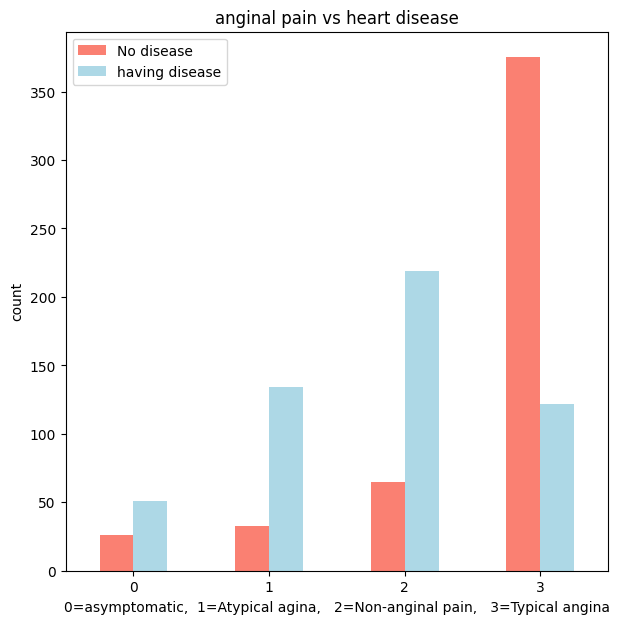

In [24]:
pd.crosstab(data1['chest_pain_type'],data1['target']).plot(kind='bar',figsize=(7,7),color=['salmon','lightblue'])
plt.xlabel('0=asymptomatic,  1=Atypical agina,   2=Non-anginal pain,   3=Typical angina')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.legend(['No disease','having disease'])
plt.title('anginal pain vs heart disease');

Here we can see that primary cause of heart disease is not anginal pain, even the patient which are not havng any anginal pain are more frequent to have heart disease

In [25]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


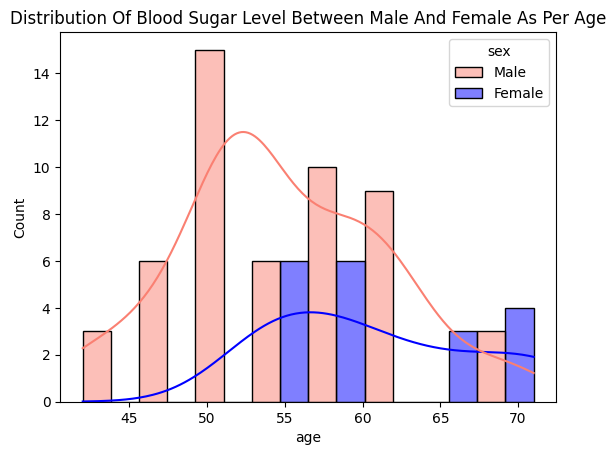

In [39]:
data2=data[(data['target']==1)&(data['fasting_blood_sugar']=='Greater than 120 mg/ml')]
sns.histplot(data=data2,x='age',kde=True,hue='sex',bins=8,multiple='dodge',palette=['salmon','blue'])
plt.title('Distribution Of Blood Sugar Level Between Male And Female As Per Age');

Here we can see that between age group of 40 to 50, blood sugar in male is significantly higher. after that it becomes gradually equal. Also juvenile diabetes is rare which is quite understandable. (data only shows persons having both blood sugar and heart disease)

In [27]:
data2=data.copy()
data2=data2[data2['fasting_blood_sugar']=='Greater than 120 mg/ml']
age_dist={}
lower_limit=0
upper_limit=20
for _ in range(5):
    m=data2['age'].apply(lambda x: 1 if x>=lower_limit and x<upper_limit else x).value_counts()
    if 1 in m:
        age_dist[f'{lower_limit}-{upper_limit}']=m[1]
    else:
        age_dist[f'{lower_limit}-{upper_limit}']=0
    lower_limit+=20
    upper_limit+=20
freq_dist=pd.DataFrame.from_dict(age_dist,orient='index')
freq_dist.reset_index(inplace=True)
freq_dist.columns=['age group','frequency']
freq_dist

,age group,frequency
0,0-20,0
1,20-40,0
2,40-60,103
3,60-80,50
4,80-100,0


here we can see that the patients suffering from blood sugar is above age of 40 (between 80-100 is zero as here the maximum age is 77)

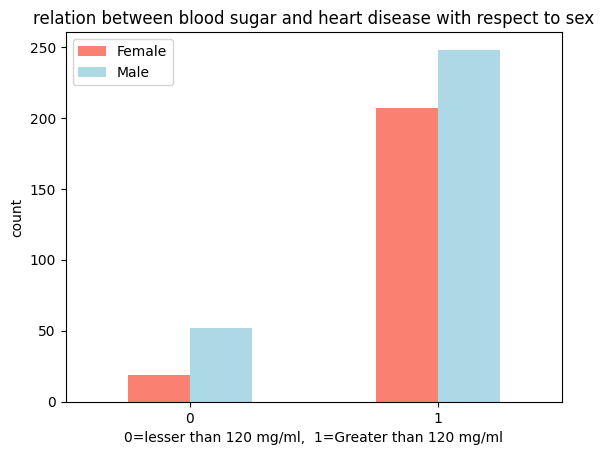

In [40]:
pd.pivot_table(data=data1[data1['target']==1],index='fasting_blood_sugar',columns='sex',values='age',aggfunc='count').plot(kind='bar',color=['salmon','lightblue'])
plt.legend(['Female','Male'])
plt.ylabel('count')
plt.xticks(rotation=0)
plt.xlabel('0=lesser than 120 mg/ml,  1=Greater than 120 mg/ml')
plt.title('relation between blood sugar and heart disease with respect to sex');

Here we can see that irrespective of gender high blood sugar can cause higher rate of heart disease

<AxesSubplot: >

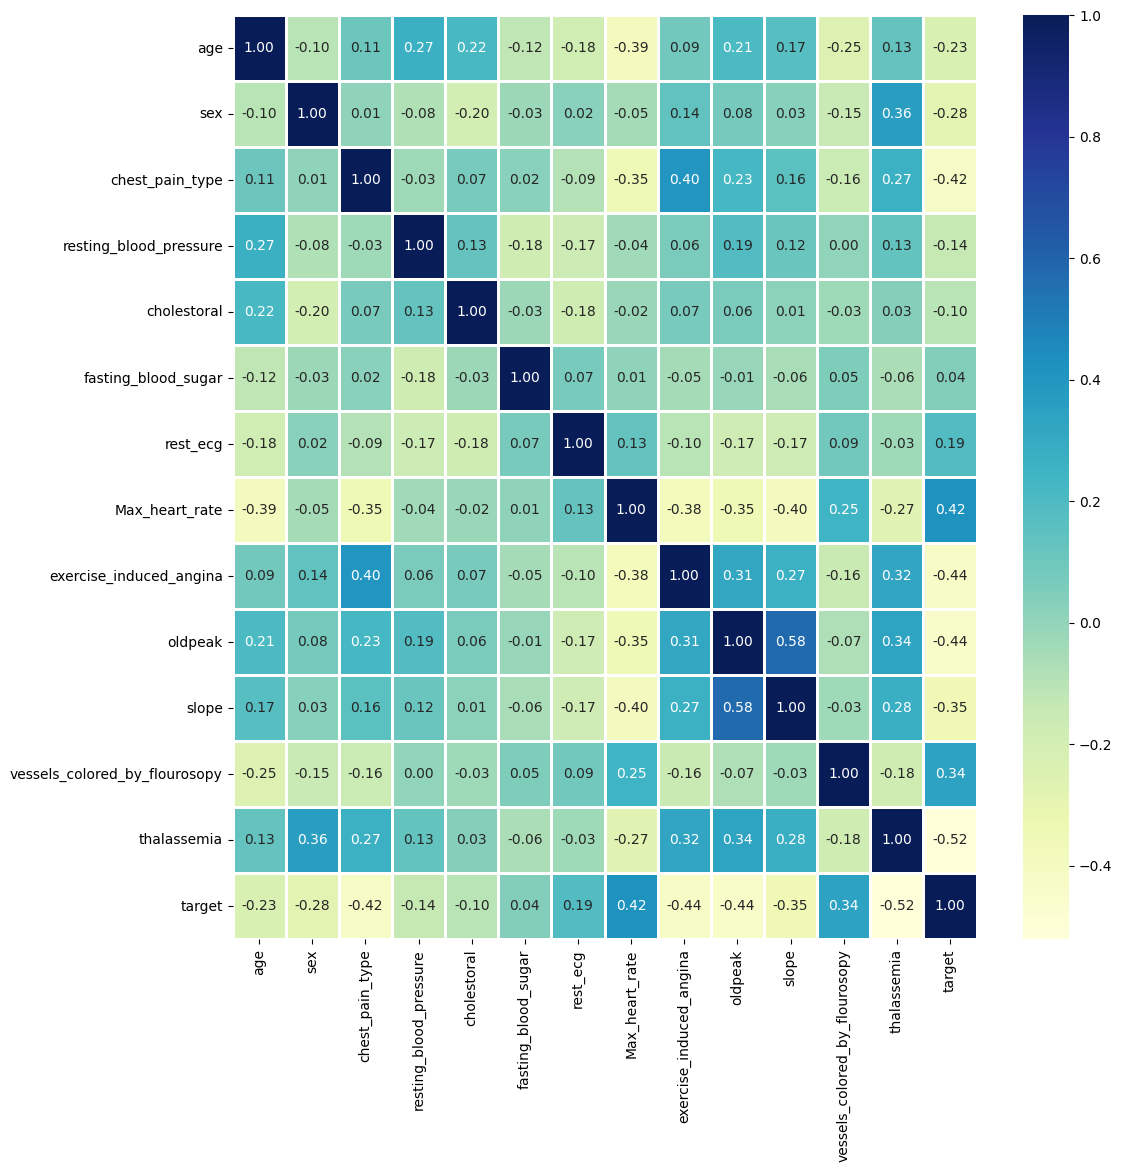

In [39]:
plt.figure(figsize=(12,12))
sns.heatmap(data1.corr(),annot=True,fmt='0.2f',linewidths=1,cmap='YlGnBu')

# Prediction and Modelling 

In [41]:
model_dict={'logistic':LogisticRegression(),
           'knn':KNeighborsClassifier(),
           'rand_f':RandomForestClassifier(),
           'svm':SVC()}

In [42]:
Y=df['target']
X=df.drop('target',axis=1)

In [43]:
np.random.seed(42)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [44]:
#initial testing 
def fit_train_model(model_dict,x_train,y_train,x_test,y_test):
    model_score={}
    for name,i in model_dict.items():
        model=i
        model.fit(x_train,y_train)
        model_score[name]=model.score(x_test,y_test)
    return model_score

In [94]:
model_dict['rand_f'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [45]:
#test score
fit_train_model(model_dict,X_train,Y_train,X_test,Y_test)  

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic': 0.8171206225680934,
 'knn': 0.7198443579766537,
 'rand_f': 0.9883268482490273,
 'svm': 0.669260700389105}

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


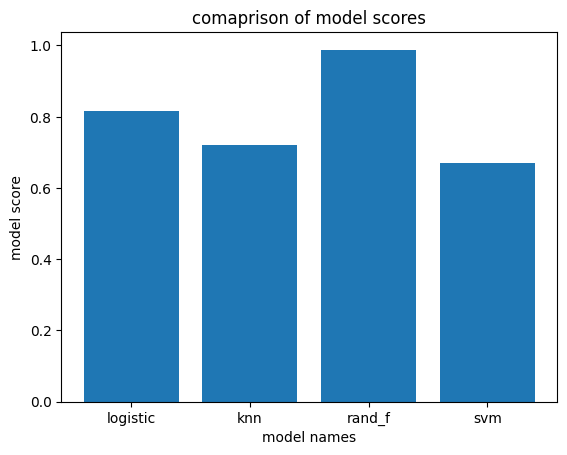

In [46]:
score_dict=fit_train_model(model_dict,X_train,Y_train,X_test,Y_test)
plt.bar(score_dict.keys(),score_dict.values())
plt.xlabel('model names')
plt.ylabel('model score')
plt.title('comaprison of model scores');

from initial investigation we can see the accuracy of the random forest model is highest

# Hyperparametric Tuning

In [47]:
#hyperparametric tuning
#for KNN
neighbours=np.arange(1,21)
score_test={}
score_train={}
for i in neighbours:
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    score_test[i]=model.score(X_test,Y_test)
    score_train[i]=model.score(X_train,Y_train)

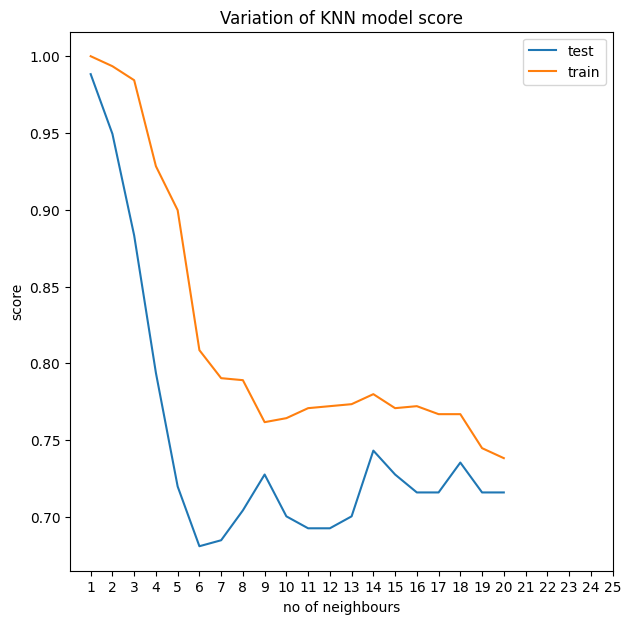

In [48]:
plt.figure(figsize=(7,7))
plt.plot(score_test.keys(),score_test.values(),label='test')
plt.plot(score_train.keys(),score_train.values(),label='train')
plt.xticks(np.arange(1,26,1))
plt.ylabel('score')
plt.xlabel('no of neighbours')
plt.title('Variation of KNN model score')
plt.legend();

Here we can see that for the test set the score is maximum when no of neighbour is one but it leads to overfitting of the model and also it will be affected by outliers, also it appears that our dataset has distinct cluster for this kind of behaviour. As hyperparametric tuning is considered we can proceed with n_neighbours=4

In [57]:
knn_updated=KNeighborsClassifier(n_neighbors=4)
knn_updated.fit(X_train,Y_train)
knn_updated.score(X_test,Y_test)

0.7937743190661478

In [51]:
#hyperparametric tuning for logistic regression
logit={'C':np.logspace(-4,4,20),
      'solver':['lbfgs', 'liblinear', 'newton-cg']}

In [ ]:
clf=RandomizedSearchCV(LogisticRegression(),param_distributions=logit,cv=5,n_iter=20,verbose=True)
clf.fit(X_train,Y_train)

In [ ]:
clf.best_estimator_

In [53]:
updated_logit=LogisticRegression(C=0.08858667904100823, solver='liblinear')
updated_logit.fit(X_train,Y_train)
updated_logit.score(X_test,Y_test)

0.8054474708171206

In [ ]:
#tuning for random forest
rf={'n_estimators':np.arange(10,1000,50),
   'max_depth':[None,3,5,10],
   'min_samples_split':np.arange(2,20,2),
   'min_samples_leaf':np.arange(1,20,2)}
clf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf,cv=5,n_iter=20,verbose=True)
clf.fit(X_train,Y_train)

In [ ]:
clf.best_params_

In [63]:
updated_rf=RandomForestClassifier(n_estimators=810,
 min_samples_split=10,
 min_samples_leaf=3)
updated_rf.fit(X_train,Y_train)
updated_rf.score(X_test,Y_test)

0.9299610894941635

hyperparametric tuning for svm

In [ ]:
svm_d={'C':np.logspace(-4,4,5),
     'kernel':['linear', 'poly', 'rbf'],
      }

In [ ]:
clf=GridSearchCV(SVC(),param_grid=svm_d,cv=5,verbose=True)
clf.fit(X_train,Y_train)

In [ ]:
clf.best_params_

In [56]:
updated_SVM=SVC(C= 10000.0,kernel='rbf')
updated_SVM.fit(X_train,Y_train)
updated_SVM.score(X_test,Y_test)

0.8171206225680934

In [81]:
y_predict=updated_rf.predict(X_test)
y_predict_prob=updated_rf.predict_proba(X_test)
y_predict_prob=np.max(y_predict_prob,axis=1)

In [87]:
Y_test.shape

(257,)

# Prediction

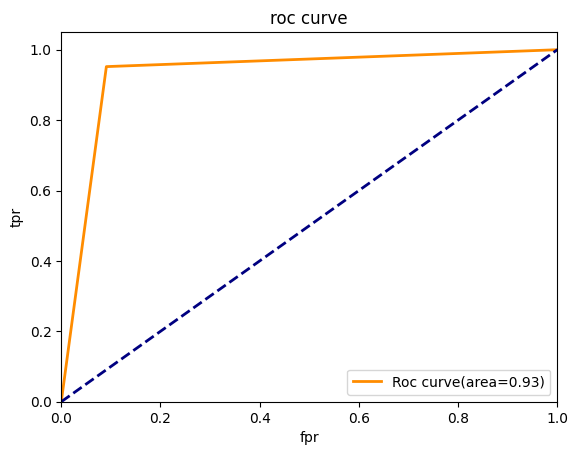

In [93]:
#Prediction

from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(Y_test,y_predict)
roc_auc=roc_auc_score(Y_test,y_predict)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=2,label=f'Roc curve(area={roc_auc:.2f})')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.legend(loc='lower right')
plt.show()



This result is quite good as the area under the curve is near to one. So we can choose the randomforest as our classifier. In this graph the X axis denotes False positive rate FP/(FP+TN) and y axis denotes True positive rate i.e recall TP/(TP+FN)

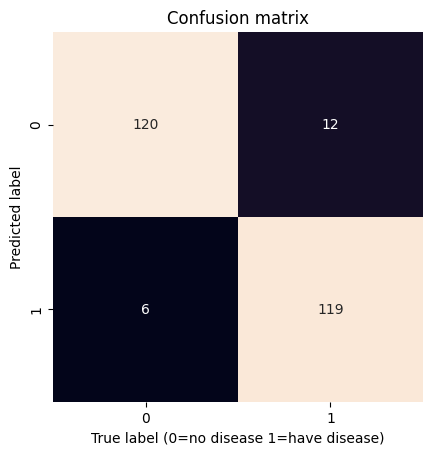

In [90]:
#confusion matrix
y_predict=updated_rf.predict(X_test)
conf_mat=confusion_matrix(Y_test,y_predict)
sns.heatmap(conf_mat,annot=True,fmt='.0f',cbar=False,square=True)
plt.xlabel('True label (0=no disease 1=have disease)')
plt.ylabel('Predicted label')
plt.title('Confusion matrix');

We can see only 18 cases our model fails out of 257 cases, which is quite good

In [62]:
#classification report
print(classification_report(Y_test,y_predict))

#manual calculation for undersanding terms
print("manual calculation for positive class")
print("======================================")
p=np.round(119/(6+119),2)
r=np.round(119/(119+12),2)
print('precesion: ',p)
print('recall: ',r)
print('f1 score: ',np.round(2*p*r/(p+r),2))
print('accuracy',np.round((119+120)/(119+120+12+6),2))
print("weighted avg precision: ",np.round((132*0.95+125*0.91)/(132+125),2))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       132
           1       0.91      0.95      0.93       125

    accuracy                           0.93       257
   macro avg       0.93      0.93      0.93       257
weighted avg       0.93      0.93      0.93       257

manual calculation for positive class
precesion:  0.95
recall:  0.91
f1 score:  0.93
accuracy 0.93
weighted avg precision:  0.93


Here we can see that f1 score, recall, precison, accuracy all values are promising. Also weighted average is near to macro average which indicates balance between positive and negative class frequency

In [64]:
#cross validated accuracy and f1 score
from sklearn.model_selection import cross_val_score
cv_acc=cross_val_score(updated_rf,X,Y,cv=5,scoring='accuracy')
print('cross validated accuracy is: ',np.mean(cv_acc))
cv_rec=cross_val_score(updated_rf,X,Y,cv=5,scoring='recall')
print('cross validated recall is: ',np.mean(cv_rec))
cv_pre=cross_val_score(updated_rf,X,Y,cv=5,scoring='precision')
print('cross validated precison is: ',np.mean(cv_pre))
cv_f1_score=cross_val_score(updated_rf,X,Y,cv=5,scoring='f1')
print('cross validated f1 score is: ',np.mean(cv_f1_score))

cross validated accuracy is:  0.9609756097560975
cross validated recall is:  0.967726864330638
cross validated precison is:  0.9500544751492555
cross validated f1 score is:  0.9613940552089494


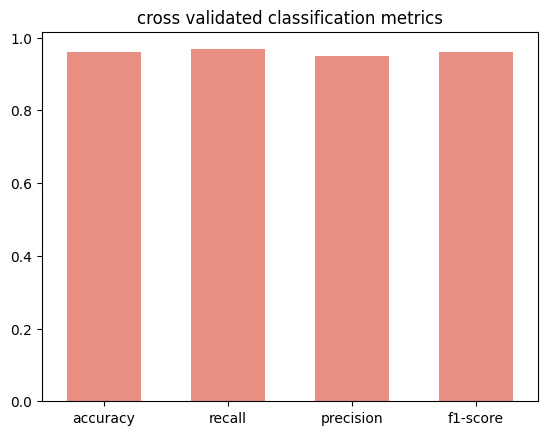

In [65]:
sns.barplot(x=['accuracy','recall','precision','f1-score',],y=[np.mean(cv_acc),np.mean(cv_rec),np.mean(cv_pre),np.mean(cv_f1_score)],width=0.6,color='salmon');
plt.title('cross validated classification metrics');

Here we have applied  k-fold cross validation to understand our model's performance due to change in test data, 5 folds are chosen and results are quite promising

In [95]:
feature_imp=updated_rf.feature_importances_
imp_dict={}
for name,imp in enumerate(feature_imp):
    imp_dict[X.columns[name]]=feature_imp[name]    

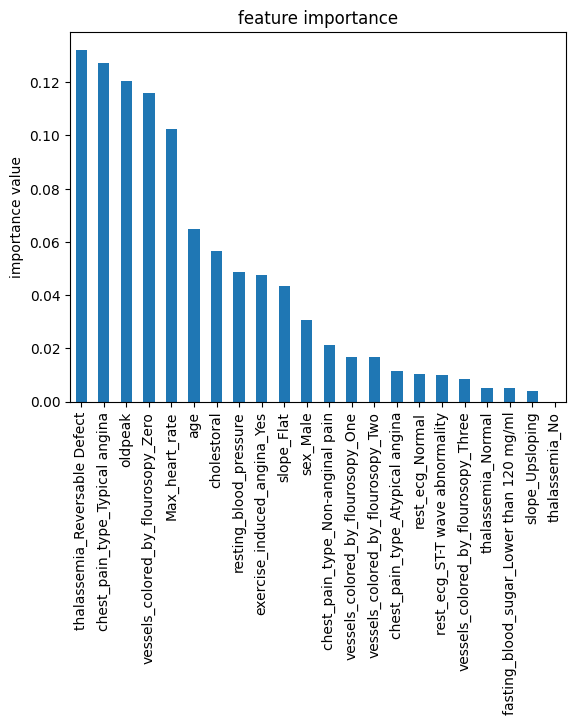

In [96]:
pd.Series(imp_dict).sort_values(ascending=False).plot(kind='bar')
plt.ylabel('importance value')
plt.title('feature importance');

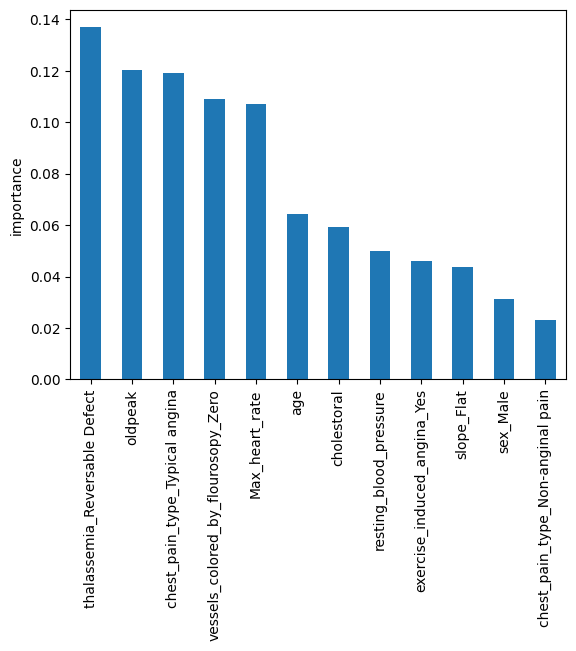

In [68]:
importance=pd.DataFrame.from_dict(imp_dict,orient='index')
importance.columns=['importance']
importance=importance[importance['importance']>=0.02].sort_values(by='importance',ascending=False)
importance.plot(kind='bar',legend=False)
plt.ylabel('importance');

taking a threshold importance value of 0.01 we have reduced the number of parameters from 23 to 12. We now have to check what will be the impact of this feature reduction in our model

In [69]:
imp_features=importance.index
X=df[imp_features]
Y=df['target']
np.random.seed(45)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)
updated_rf=RandomForestClassifier(n_estimators=810,
 min_samples_split=10,
 min_samples_leaf=3)
updated_rf.fit(X_train,Y_train)
updated_rf.score(X_test,Y_test)

0.9377431906614786

Here we can see that our model has become a little better actually with this 12 features only, previousy the score was 0.92 now its 0.94

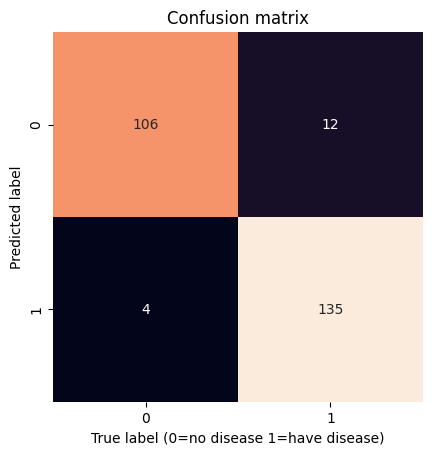

In [70]:
#new confusion matrix
y_predict=updated_rf.predict(X_test)
conf_mat=confusion_matrix(Y_test,y_predict)
sns.heatmap(conf_mat,annot=True,fmt='.0f',cbar=False,square=True)
plt.xlabel('True label (0=no disease 1=have disease)')
plt.ylabel('Predicted label')
plt.title('Confusion matrix');

# Analysis of predicted value

In [71]:
#test prediction
x_=[[0,0,0,1,164,59,221,1,140,0,1,0]]
if updated_rf.predict(x_)[0]==1:
    print('have heart disease')
else:
    print('does not have heart disease')

have heart disease


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [72]:
#random correct classification
ind=np.random.choice(X.index)
predicted=updated_rf.predict(X.iloc[ind,:].values.reshape(1,-1))[0]
actual=Y[ind]
if predicted==actual:
    print('correct prediction by model !',end=" ")
    if actual==1:
        print('person has heart disease')
    else:
        print('person does not have heart disease')
    print('\n')
else:
    print('model fails to predict !',end=" ")
    if actual==1 and predicted==0:
        print('person has heart disease where predicted the person has not')
    else:
        print('person has heart disease where predicted he/she does not')
    

correct prediction by model ! person does not have heart disease




/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Additional investigation

As our logistic regression and svm classifier model fails, we should see whether scaling the data or normalising the data can make any impact or not

In [73]:
data_sc=df.copy()
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_sc[numeric_data]=scaler.fit_transform(data_sc[numeric_data])

In [74]:
np.random.seed(35)
x_train,x_test,y_train,y_test=train_test_split(data_sc,Y,test_size=0.2)

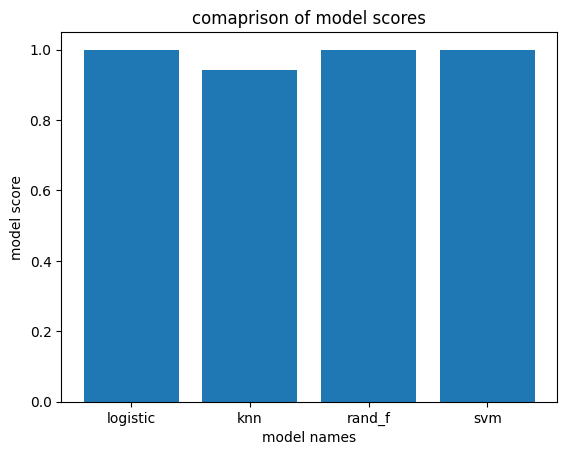

In [75]:
score_dict=fit_train_model(model_dict,x_train,y_train,x_test,y_test)
plt.bar(score_dict.keys(),score_dict.values())
plt.xlabel('model names')
plt.ylabel('model score')
plt.title('comaprison of model scores');

So here we can see that with standard scaler all our model are working excellent !!

In [76]:
#saving model
import pickle
with open('updated_rf.pkl', 'wb') as file:
    pickle.dump(updated_rf, file)
